In [151]:
import time

import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [152]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']


In [153]:
file = tf.keras.utils
# raw_df = pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv')
# raw_df.head()

exported_path = 'tensorflow_group_datasets/one_res_small/0_no_leaks_rand_base_demand/'
dataset_path = exported_path

out_filename = '1M_one_res_small_leaks_ordered_group_0_node_0_0164_merged.csv'
raw_df1 = pd.read_csv(dataset_path+out_filename, delimiter=";")

exported_path = 'tensorflow_group_datasets/one_res_small/1_at_82_leaks_rand_base_demand/'
dataset_path = exported_path
# leak_node = 3

leak_area = "0164" # "0246" #"0164"
leak_group = 3
leak_node = 6
out_filename = "1M_one_res_small_leaks_ordered_group_"+str(leak_group)+"_node_"+str(leak_node)+"_"+leak_area+"_merged.csv"
raw_df2 = pd.read_csv(dataset_path+out_filename, delimiter=";")

# leak_node = 5
# leak_group = 2
# out_filename = "1M_one_res_small_leaks_ordered_group_"+str(leak_group)+"_node_"+str(leak_node)+"_"+leak_area+"_merged.csv"
# raw_df3 = pd.read_csv(dataset_path+out_filename, delimiter=";")
#
# leak_group = 3
# out_filename = "1M_one_res_small_leaks_ordered_group_"+str(leak_group)+"_node_"+str(leak_node)+"_"+leak_area+"_merged.csv"
# raw_df4 = pd.read_csv(dataset_path+out_filename, delimiter=";")
#
# leak_group = 4
# out_filename = "1M_one_res_small_leaks_ordered_group_"+str(leak_group)+"_node_"+str(leak_node)+"_"+leak_area+"_merged.csv"
# raw_df5 = pd.read_csv(dataset_path+out_filename, delimiter=";")
#
# leak_group = 5
# out_filename = "1M_one_res_small_leaks_ordered_group_"+str(leak_group)+"_node_"+str(leak_node)+"_"+leak_area+"_merged.csv"
# raw_df6 = pd.read_csv(dataset_path+out_filename, delimiter=";")
#
# leak_group = 6
# out_filename = "1M_one_res_small_leaks_ordered_group_"+str(leak_group)+"_node_"+str(leak_node)+"_"+leak_area+"_merged.csv"
# raw_df7 = pd.read_csv(dataset_path+out_filename, delimiter=";")
#
# leak_group = 7
# out_filename = "1M_one_res_small_leaks_ordered_group_"+str(leak_group)+"_node_"+str(leak_node)+"_"+leak_area+"_merged.csv"
# raw_df8 = pd.read_csv(dataset_path+out_filename, delimiter=";")

# Appending multiple DataFrame
raw_df = pd.concat([raw_df1, raw_df2])#raw_df4, raw_df5, raw_df6, raw_df7, raw_df8])
# options = ["8626", "8628", "8630", "8644", "8634", "8632", "8636", "8646", "8688", "8640"]
# raw_df = raw_df.loc[raw_df['nodeID'].isin(options)]

raw_df.reset_index(drop=True, inplace=True)
# raw_df.head()


In [154]:
# columns = ["Index(['hour;nodeID;base_demand;demand_value;head_value;pressure_value;x_pos;y_pos;node_type;has_leak;leak_area_value;leak_discharge_value;leak_demand_value;flow_demand_in;demand_0;head_0;pressure_0;demand_1;head_1;pressure_1;demand_2;head_2;pressure_2;demand_3;head_3;pressure_3;demand_4;head_4;pressure_4;demand_5;head_5;pressure_5;demand_6;head_6;pressure_6;demand_7;head_7;pressure_7;demand_8;head_8;pressure_8;demand_9;head_9;pressure_9;flow_demand_out;leak_group'], dtype='object')"]

# column = ["flow_demand_in", "demand_0", "head_0", "pressure_0", "demand_1", "head_1", "pressure_1"]
# column = ['nodeID']
# ;demand_2;head_2;pressure_2;demand_3;head_3;pressure_3;demand_4;head_4;pressure_4;demand_5;head_5;pressure_5;demand_6;head_6;pressure_6;demand_7;head_7;pressure_7;demand_8;head_8;pressure_8;demand_9;head_9;pressure_9;flow_demand_out;leak_group'], dtype='object')"]

# print(raw_df.columns)
# raw_df.describe()


In [155]:
cleaned_df = raw_df.copy()

# You don't want the `Time` column.
# cleaned_df.pop('Time')

#hour', 'nodeID', 'base_demand', 'demand_value', 'head_value',
       # 'pressure_value', 'x_pos', 'y_pos', 'node_type', 'has_leak',
       # 'leak_area_value', 'leak_discharge_value', 'leak_demand_value',
       # 'flow_demand_in', 'demand_0', 'head_0', 'pressure_0', 'demand_1',
       # 'head_1', 'pressure_1', 'demand_2', 'head_2', 'pressure_2', 'demand_3',
       # 'head_3', 'pressure_3', 'demand_4', 'head_4', 'pressure_4', 'demand_5',
       # 'head_5', 'pressure_5', 'demand_6', 'head_6', 'pressure_6', 'demand_7',
       # 'head_7', 'pressure_7', 'demand_8', 'head_8', 'pressure_8', 'demand_9',
       # 'head_9', 'pressure_9', 'flow_demand_out', 'leak_group'


pop_col = ['hour', 'nodeID',
           # 'base_demand', 'demand_value', 'head_value', 'pressure_value', 'x_pos', 'y_pos',
           'node_type', 'leak_area_value', 'leak_discharge_value', 'leak_demand_value',
           # 'leak_group',
           'has_leak'
           ]

cleaned_df = cleaned_df.drop(pop_col, axis=1)

cleaned_df.rename(columns = {'leak_group':'Class'}, inplace = True)
# cleaned_df.rename(columns = {'has_leak':'Class'}, inplace = True)



In [156]:
neg, pos = np.bincount(cleaned_df['Class'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))


Examples:
    Total: 107520
    Positive: 6720 (6.25% of total)



In [157]:

# The `Amount` column covers a huge range. Convert to log-space.
# eps = 0.001 # 0 => 0.1¢
# cleaned_df['Log Ammount'] = np.log(cleaned_df.pop('Amount')+eps)


In [158]:
# Use a utility from sklearn to split and shuffle your dataset.
train_df, test_df = train_test_split(cleaned_df, test_size=0.2)
train_df, val_df = train_test_split(train_df, test_size=0.2)

# Form np arrays of labels and features.
train_labels = np.array(train_df.pop('Class'))
bool_train_labels = train_labels != 0
val_labels = np.array(val_df.pop('Class'))
test_labels = np.array(test_df.pop('Class'))

train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)


In [159]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)

val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

# train_features = np.clip(train_features, -5, 5)
# val_features = np.clip(val_features, -5, 5)
# test2_features = np.clip(test2_features, -5, 5)
# test_features = np.clip(test_features, -5, 5)

print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)


Training labels shape: (68812,)
Validation labels shape: (17204,)
Test labels shape: (21504,)
Training features shape: (68812, 38)
Validation features shape: (17204, 38)
Test features shape: (21504, 38)


In [160]:
# sns.pairplot(cleaned_df.loc[0:200])

# plt.figure(figsize = (12,8))
# cmap = sns.diverging_palette(230,20,as_cmap=True)
# sns.heatmap(cleaned_df.loc[0:200].corr(),annot=True,fmt='.2f',cmap=cmap)
# plt.show()

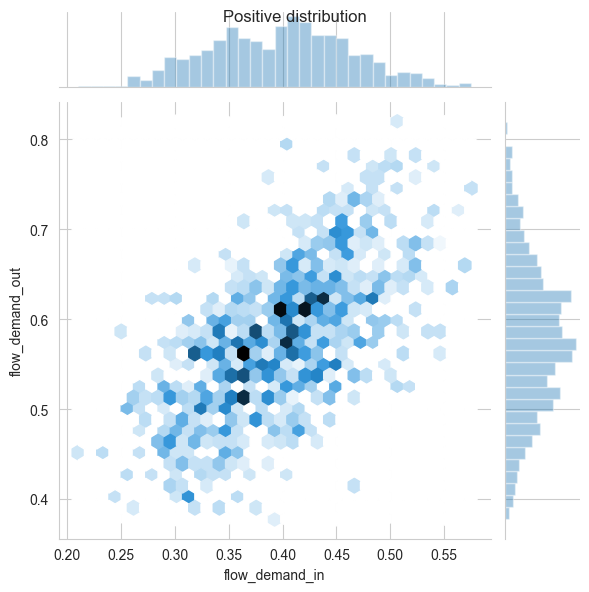

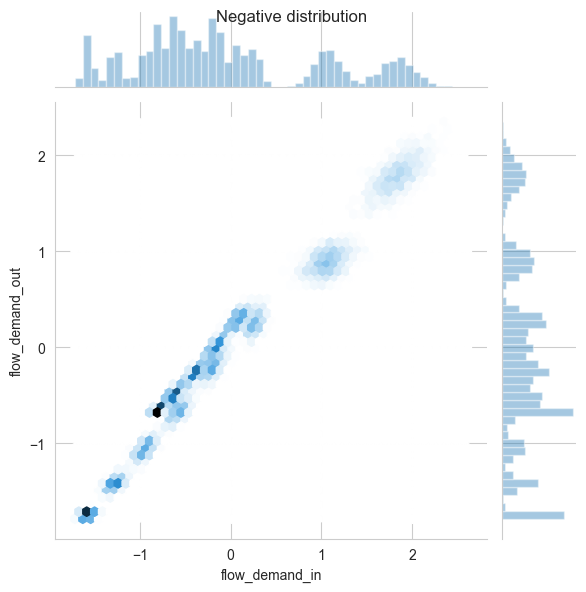

In [161]:
pos_df = pd.DataFrame(train_features[ bool_train_labels], columns=train_df.columns)
neg_df = pd.DataFrame(train_features[~bool_train_labels], columns=train_df.columns)
# !python

sns.jointplot(x=pos_df['flow_demand_in'], y=pos_df['flow_demand_out'],
              kind='hex')
plt.suptitle("Positive distribution")

sns.jointplot(x=neg_df['flow_demand_in'], y=neg_df['flow_demand_out'],
              kind='hex')

_ = plt.suptitle("Negative distribution")


In [162]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'),
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

def make_model(metrics=METRICS, output_bias=None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = keras.Sequential([
      keras.layers.Dense(
          38, activation='relu',
          input_shape=(train_features.shape[-1],)),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(1, activation='sigmoid', bias_initializer=output_bias),
  ])

  model.compile(
      optimizer=keras.optimizers.Adam(learning_rate=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

  return model

In [163]:
EPOCHS = 600
BATCH_SIZE = 2048

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_prc',
    verbose=1,
    patience=30,
    mode='max',
    restore_best_weights=True)


In [164]:
model = make_model()
model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 38)                1482      
                                                                 
 dropout_25 (Dropout)        (None, 38)                0         
                                                                 
 dense_51 (Dense)            (None, 1)                 39        
                                                                 
Total params: 1,521
Trainable params: 1,521
Non-trainable params: 0
_________________________________________________________________


In [165]:
# model.predict(train_features[:10])
# results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
# print("Loss: {:0.4f}".format(results[0]))

In [166]:
# initial_bias
initial_bias = np.log([pos/neg])
# initial_bias
model = make_model(output_bias=initial_bias)
#
model.predict(train_features[:10])
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))
#
initial_weights = os.path.join(tempfile.mkdtemp(), 'initial_weights')
model.save_weights(initial_weights)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 0s 83ms/step
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report t

In [167]:
model = make_model()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0])
zero_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels),
    verbose=0)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

In [168]:
model = make_model()
model.load_weights(initial_weights)
careful_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels),
    verbose=0)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

In [169]:
def plot_loss(history, label, n):
  # Use a log scale on y-axis to show the wide range of values.
  plt.semilogy(history.epoch, history.history['loss'],
               color=colors[n], label='Train ' + label)
  plt.semilogy(history.epoch, history.history['val_loss'],
               color=colors[n], label='Val ' + label,
               linestyle="--")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()

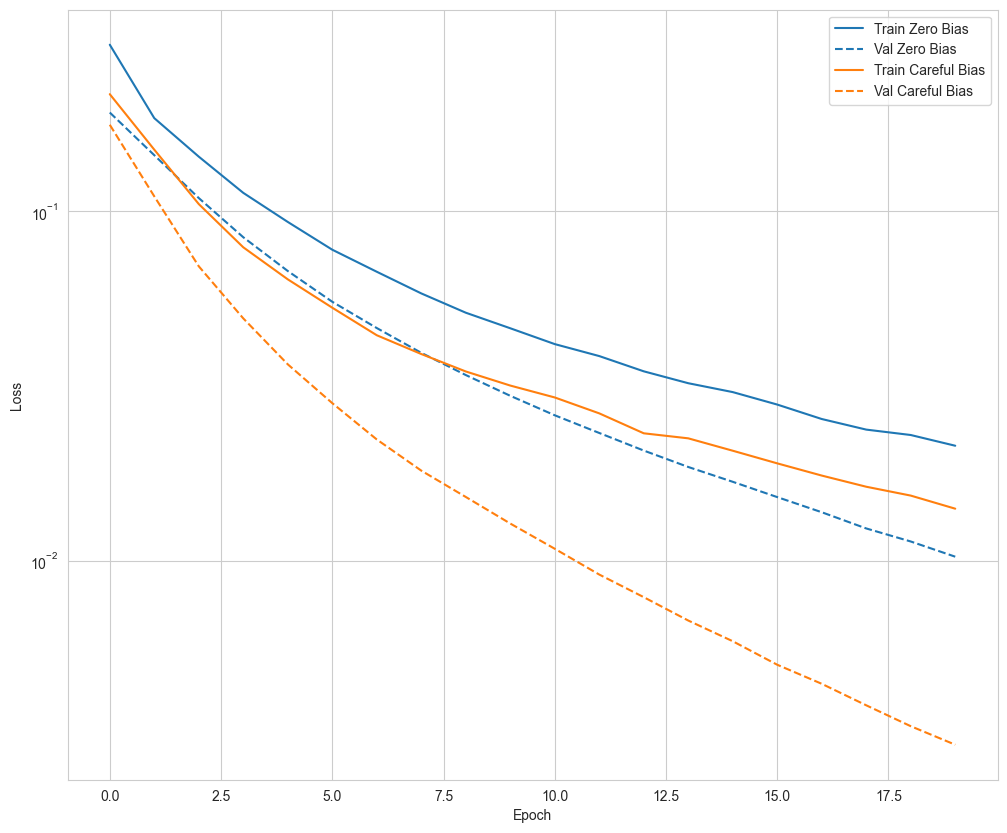

In [170]:
plot_loss(zero_bias_history, "Zero Bias", 0)
plot_loss(careful_bias_history, "Careful Bias", 1)

In [171]:
model = make_model()
model.load_weights(initial_weights)
baseline_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels))


Epoch 1/600
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
27/34 [======================>.......] - ETA: 0s - loss: 0.2242 - tp: 1122.0000 - fp: 1.0000 - tn: 67909.0000 - fn: 3468.0000 - accuracy: 0.9522 - precision: 0.9991 - recall: 0.2444 - auc: 0.8165 - prc: 0.4158WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000001AC6368E048> and will run it as-is.
Plea

In [172]:
model.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_58 (Dense)            (None, 38)                1482      
                                                                 
 dropout_29 (Dropout)        (None, 38)                0         
                                                                 
 dense_59 (Dense)            (None, 1)                 39        
                                                                 
Total params: 1,521
Trainable params: 1,521
Non-trainable params: 0
_________________________________________________________________


In [173]:
def plot_metrics(history):
  metrics = ['loss', 'prc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1.1])
    else:
      plt.ylim([0,1.1])

    plt.legend();


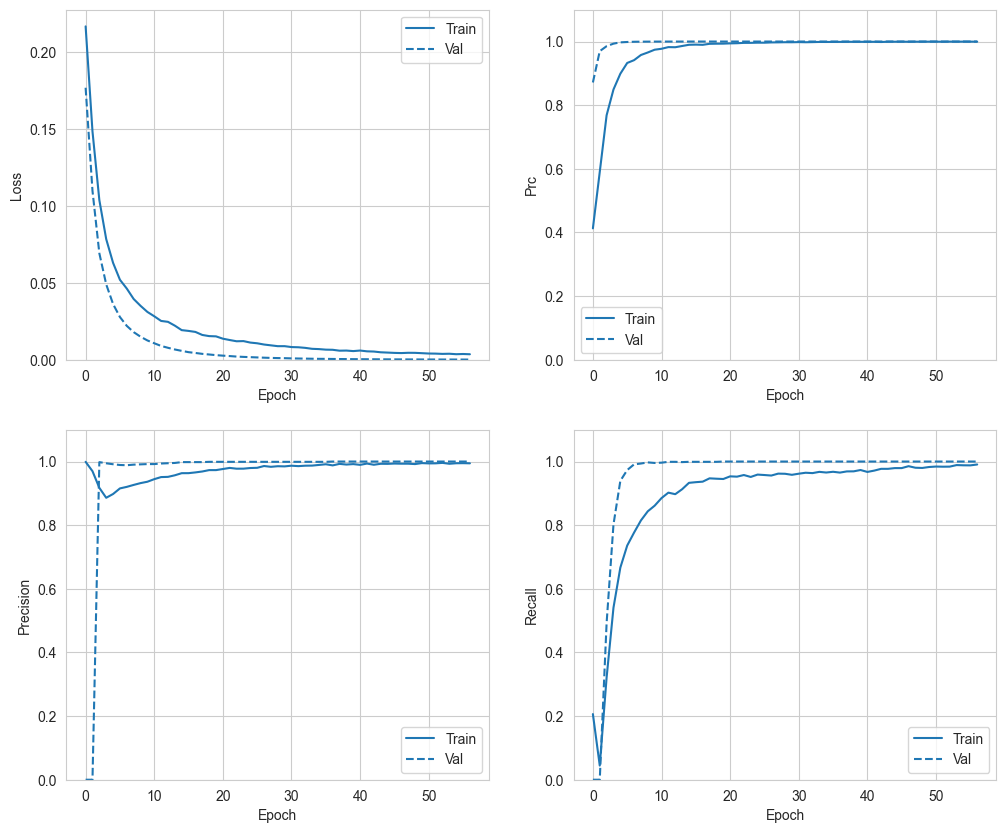

In [174]:
plot_metrics(baseline_history)


In [175]:
def plot_cm(labels, predictions, title, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  # plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.title(title)
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('not leakage Detected (True Negatives): ', cm[0][0])
  print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
  print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
  print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
  print('Total Fraudulent Transactions: ', np.sum(cm[1]))

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
11/11 [==============================] - 0s 2ms/step
not leakage Detected (True Negatives):  20218
Legitimate Transactions Incorrectly Detected (False Positives):  5
Fraudulent Transactions Missed (False Negatives):  0
Fraudulent Transactions Detected (True Positives):  1281
Total Fraudulent Transactions:  1281


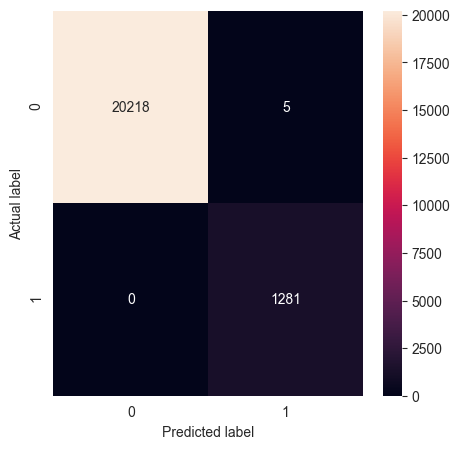

In [176]:
# train_predictions_baseline = model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_baseline = model.predict(test_features, batch_size=BATCH_SIZE)
plot_cm(test_labels, test_predictions_baseline, '')


In [177]:
baseline_results = model.evaluate(test_features, test_labels, batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

loss :  0.001632342697121203
tp :  1281.0
fp :  5.0
tn :  20218.0
fn :  0.0
accuracy :  0.9997674822807312
precision :  0.9961119890213013
recall :  1.0
auc :  1.0
prc :  1.0



27/27 [==============================] - 0s 1ms/step
not leakage Detected (True Negatives):  47040
Legitimate Transactions Incorrectly Detected (False Positives):  0
Fraudulent Transactions Missed (False Negatives):  562
Fraudulent Transactions Detected (True Positives):  6158
Total Fraudulent Transactions:  6720
loss :  0.029402179643511772
tp :  6158.0
fp :  0.0
tn :  47040.0
fn :  562.0
accuracy :  0.9895461201667786
precision :  1.0
recall :  0.9163690209388733
auc :  0.9999982714653015
prc :  0.9999880790710449



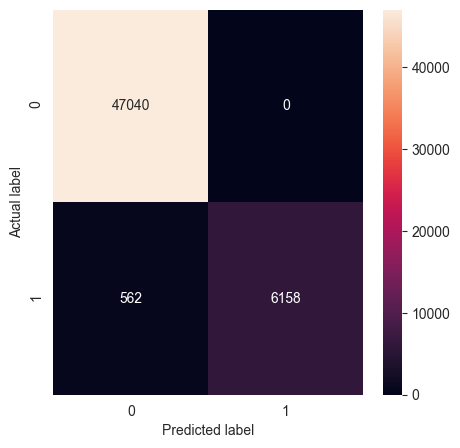

In [185]:
leak_area = "0164" # "0246" #"0164"
leak_group_test = leak_group
leak_node_test = 1
out_filename = "1M_one_res_small_leaks_ordered_group_"+str(leak_group_test)+"_node_"+str(leak_node_test)+"_"+leak_area+"_merged.csv"
raw_df_test = pd.read_csv(dataset_path+out_filename, delimiter=";")

cleaned_df_test = raw_df_test.copy()
#hour', 'nodeID', 'base_demand', 'demand_value', 'head_value',
       # 'pressure_value', 'x_pos', 'y_pos', 'node_type', 'has_leak',
       # 'leak_area_value', 'leak_discharge_value', 'leak_demand_value',
       # 'flow_demand_in', 'demand_0', 'head_0', 'pressure_0', 'demand_1',
       # 'head_1', 'pressure_1', 'demand_2', 'head_2', 'pressure_2', 'demand_3',
       # 'head_3', 'pressure_3', 'demand_4', 'head_4', 'pressure_4', 'demand_5',
       # 'head_5', 'pressure_5', 'demand_6', 'head_6', 'pressure_6', 'demand_7',
       # 'head_7', 'pressure_7', 'demand_8', 'head_8', 'pressure_8', 'demand_9',
       # 'head_9', 'pressure_9', 'flow_demand_out', 'leak_group'

pop_col = ['hour', 'nodeID',
           # 'base_demand', 'demand_value', 'head_value', 'pressure_value', 'x_pos', 'y_pos',
           'node_type', 'leak_area_value', 'leak_discharge_value', 'leak_demand_value',
           # 'leak_group',
           'has_leak'
           ]
cleaned_df_test = cleaned_df_test.drop(pop_col, axis=1)
cleaned_df_test.rename(columns = {'leak_group':'Class'}, inplace = True)
# cleaned_df_test.rename(columns = {'has_leak':'Class'}, inplace = True)

test2_labels = np.array(cleaned_df_test.pop('Class'))
test2_features = np.array(cleaned_df_test)

# scaler = StandardScaler()
test2_features = scaler.transform(test2_features)

test2_predictions_baseline = model.predict(test2_features, batch_size=BATCH_SIZE)
plot_cm(test2_labels, test2_predictions_baseline, '')

baseline_results = model.evaluate(test2_features, test2_labels, batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()


In [387]:
# def plot_roc(name, labels, predictions, **kwargs):
#   fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)
#
#   plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
#   plt.xlabel('False positives [%]')
#   plt.ylabel('True positives [%]')
#   plt.xlim([-0.5,20])
#   plt.ylim([80,100.5])
#   plt.grid(True)
#   ax = plt.gca()
#   ax.set_aspect('equal')


In [388]:
# plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
# plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')
# plt.legend(loc='lower right');


In [389]:
# import csv
#
# out_filename_complete = "report_model_comparison_leak_group_"+ str(leak_group) + "_leak_node_" + str(leak_node) +".csv"
# out = open(out_filename_complete, "w", newline='', encoding='utf-8')
# writer = csv.writer(out, delimiter=';')
# header = ["leak_group_model", "leak_node_model", "leak_node_test", "loss", "accuracy" ]
# writer.writerow(header)
#
#
# leak_area_final_test = "0164" # "0246" #"0164"
#
# for final_test_index in range(3,4,1):
#     print(leak_group)
#     leak_group_final_test = leak_group
#     for final_test_index in range(1,9,1):
#
#         leak_node_final_test = final_test_index
#         out_filename = "1M_one_res_small_leaks_ordered_group_"+str(leak_group_final_test)+"_node_"+str(leak_node_final_test)+"_"+leak_area_final_test+"_merged.csv"
#         print(out_filename)
#         raw_df_test_2 = pd.read_csv(dataset_path+out_filename, delimiter=";")
#
#         cleaned_df_test_2 = raw_df_test_2.copy()
#         cleaned_df_test_2 = cleaned_df_test_2.drop(pop_col, axis=1)
#         cleaned_df_test_2.rename(columns = {'leak_group':'Class'}, inplace = True)
#         # cleaned_df_validation.rename(columns = {'has_leak':'Class'}, inplace = True)
#
#         test2_labels_2 = np.array(cleaned_df_test_2.pop('Class'))
#         test2_features_2 = np.array(cleaned_df_test_2)
#
#         test2_features_2 = scaler.transform(test2_features_2)
#         test2_predictions_baseline = model.predict(test2_features_2, batch_size=BATCH_SIZE)
#
#         # baseline_results =model.evaluate(test2_features_2, test2_labels_2, batch_size=BATCH_SIZE, verbose=0)
#         # for name, value in zip(model.metrics_names, baseline_results):
#         #   print(name, ': ', value)
#         # print()
#
#         baseline_results =model.evaluate(test2_features_2, test2_labels_2, batch_size=BATCH_SIZE, verbose=0)
#         for name, value in zip(model.metrics_names, baseline_results):
#           if name == "loss":
#             loss = value
#             print(name, ': ', value)
#           if name == "accuracy":
#             acc = value
#             print(name, ': ', value)
#         print()
#
#         # title = "group : "+ str(leak_group_final_test) + " - node : " + str(leak_node_final_test)
#         # plot_cm(test2_labels_2, test2_predictions_baseline, title)
#
#         out_row = [leak_group,leak_node,leak_node_final_test, loss, acc]
#         writer.writerow(out_row)
#
# out.close()



In [390]:

leak_area_final_test = "0164" # "0246" #"0164"
for final_test_index in range(3,4,1):
    print(leak_group)
    leak_group_final_test = leak_group
    for final_test_index in range(1,10,1):

        leak_node_final_test = final_test_index
        out_filename = "1M_one_res_small_leaks_ordered_group_"+str(leak_group_final_test)+"_node_"+str(leak_node_final_test)+"_"+leak_area_final_test+"_merged.csv"
        print(out_filename)
        raw_df_test_2 = pd.read_csv(dataset_path+out_filename, delimiter=";")

        cleaned_df_test_2 = raw_df_test_2.copy()
        cleaned_df_test_2 = cleaned_df_test_2.drop(pop_col, axis=1)
        cleaned_df_test_2.rename(columns = {'leak_group':'Class'}, inplace = True)
        # cleaned_df_validation.rename(columns = {'has_leak':'Class'}, inplace = True)

        test2_labels_2 = np.array(cleaned_df_test_2.pop('Class'))
        test2_features_2 = np.array(cleaned_df_test_2)

        test2_features_2 = scaler.transform(test2_features_2)
        # test2_predictions_baseline = model.predict(test2_features_2, batch_size=BATCH_SIZE)

        # baseline_results =model.evaluate(test2_features_2, test2_labels_2, batch_size=BATCH_SIZE, verbose=0)
        # for name, value in zip(model.metrics_names, baseline_results):
        #   print(name, ': ', value)
        # print()

        baseline_results =model.evaluate(test2_features_2, test2_labels_2, batch_size=BATCH_SIZE, verbose=0)
        for name, value in zip(model.metrics_names, baseline_results):
          if name == "loss":
            loss = value
            print(name, ': ', value)
          if name == "accuracy":
            acc = value
            print(name, ': ', value)
        print()

        # title = "group : "+ str(leak_group_final_test) + " - node : " + str(leak_node_final_test)
        # plot_cm(test2_labels_2, test2_predictions_baseline, title)



3
1M_one_res_small_leaks_ordered_group_3_node_1_0164_merged.csv
loss :  0.04100770503282547
accuracy :  0.992001473903656

1M_one_res_small_leaks_ordered_group_3_node_2_0164_merged.csv
loss :  0.010551613755524158
accuracy :  1.0

1M_one_res_small_leaks_ordered_group_3_node_3_0164_merged.csv
loss :  0.09624328464269638
accuracy :  0.945126473903656

1M_one_res_small_leaks_ordered_group_3_node_4_0164_merged.csv
loss :  0.006009654141962528
accuracy :  1.0

1M_one_res_small_leaks_ordered_group_3_node_5_0164_merged.csv
loss :  0.0055929552763700485
accuracy :  1.0

1M_one_res_small_leaks_ordered_group_3_node_6_0164_merged.csv
loss :  0.009006308391690254
accuracy :  0.9994419813156128

1M_one_res_small_leaks_ordered_group_3_node_7_0164_merged.csv
loss :  0.09877921640872955
accuracy :  0.945684552192688

1M_one_res_small_leaks_ordered_group_3_node_8_0164_merged.csv
loss :  0.01959480345249176
accuracy :  0.996465802192688

1M_one_res_small_leaks_ordered_group_3_node_9_0164_merged.csv
loss

In [391]:

# leak_area_final_test = "0164" # "0246" #"0164"
#
# exported_path = 'tensorflow_group_datasets/one_res_small/1_at_82_leaks_rand_base_demand/'
# dataset_path = exported_path
# # leak_node = 3
#
#
# raw_df_test_2_all = None
# # for final_test_group_index in range(5,6,1):
# if True:
#     leak_group_final_test = 3#final_test_group_index #3
#
#     for final_test_index in range(1,10,1):
#         leak_node_final_test = final_test_index
#
#         out_filename = "1M_one_res_small_leaks_ordered_group_"+str(leak_group_final_test)+"_node_"+str(leak_node_final_test)+"_"+leak_area_final_test+"_merged.csv"
#         print(out_filename)
#         raw_df_test_2 = pd.read_csv(dataset_path+out_filename, delimiter=";")
#
#         # Appending multiple DataFrame
#         raw_df_test_2_all = pd.concat([raw_df_test_2_all, raw_df_test_2])
#         raw_df_test_2_all.reset_index(drop=True, inplace=True)
#
#
#
# # options = ["8626", "8628", "8630", "8644", "8634", "8632", "8636", "8646", "8688", "8640"]
# # raw_df_test_2_all = raw_df_test_2_all.loc[raw_df_test_2_all['nodeID'].isin(options)]
#
#
#
# cleaned_df_test_2 = raw_df_test_2_all.copy()
# cleaned_df_test_2 = cleaned_df_test_2.drop(pop_col, axis=1)
# cleaned_df_test_2.rename(columns = {'leak_group':'Class'}, inplace = True)
# # cleaned_df_test_2.rename(columns = {'has_leak':'Class'}, inplace = True)
#
# test2_labels_2 = np.array(cleaned_df_test_2.pop('Class'))
# test2_features_2 = np.array(cleaned_df_test_2)
#
# test2_features_2 = scaler.transform(test2_features_2)
# test2_predictions_baseline = model.predict(test2_features_2, batch_size=BATCH_SIZE)
#
# baseline_results = model.evaluate(test2_features_2, test2_labels_2, batch_size=BATCH_SIZE, verbose=0)
# for name, value in zip(model.metrics_names, baseline_results):
#   print(name, ': ', value)
# print()
#
# title = "group : "+ str(leak_group_final_test) #+ " - node : " + str(leak_node_final_test)
# plot_cm(test2_labels_2, test2_predictions_baseline, title)


In [392]:
# print(test2_features_2[0])
# print(test2_labels_2[0])

In [393]:
# print(test2_features_2[0:1])
# print(test2_labels_2[0:1])
# print(model.predict(test2_features_2[0:1], batch_size=BATCH_SIZE))


In [394]:
# model.save('tensorflow_group_datasets/model/first')


In [395]:
model.save('tensorflow_group_datasets/model/first_h5/model_first.h5')


In [397]:
import time

# Recreate the exact same model, including its weights and the optimizer
loaded_model = tf.keras.models.load_model('tensorflow_group_datasets/model/first_h5/model_first.h5')

# Show the model architecture
# loaded_model.summary()

leak_area_final_test = "0164"
leak_group_final_test = leak_group
leak_node_final_test = 2
out_filename = "1M_one_res_small_leaks_ordered_group_"+str(leak_group_final_test)+"_node_"+str(leak_node_final_test)+"_"+leak_area_final_test+"_merged.csv"
print(out_filename)
raw_df_test_2 = pd.read_csv(dataset_path+out_filename, delimiter=";")

cleaned_df_test_2 = raw_df_test_2.copy()
cleaned_df_test_2 = cleaned_df_test_2.drop(pop_col, axis=1)
cleaned_df_test_2.rename(columns = {'leak_group':'Class'}, inplace = True)
# cleaned_df_validation.rename(columns = {'has_leak':'Class'}, inplace = True)

test2_labels_2 = np.array(cleaned_df_test_2.pop('Class'))
test2_features_2 = np.array(cleaned_df_test_2)

test2_features_2 = scaler.transform(test2_features_2)

# baseline_results =loaded_model.evaluate(test2_features_2, test2_labels_2, batch_size=BATCH_SIZE, verbose=0)
# for name, value in zip(loaded_model.metrics_names, baseline_results):
#   print(name, ': ', value)
# print()

baseline_results =loaded_model.evaluate(test2_features_2, test2_labels_2, batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(loaded_model.metrics_names, baseline_results):
  if name == "loss":
    loss = value
    print(name, ': ', value)
  if name == "accuracy":
    acc = value
    print(name, ': ', value)
print()


# test2_predictions_baseline = loaded_model.predict(test2_features_2, batch_size=BATCH_SIZE)

# title = "group : "+ str(leak_group_final_test) + " - node : " + str(leak_node_final_test)
# plot_cm(test2_labels_2, test2_predictions_baseline, title)


# print(test2_features_2[0:1])
# print(test2_labels_2[0:1])
for ii in range(100):
    print(ii)
    print(test2_labels_2[ii:ii+1])
    print(loaded_model.predict(test2_features_2[ii:ii+1], batch_size=BATCH_SIZE))
    print("")
    time.sleep(1)





1M_one_res_small_leaks_ordered_group_3_node_2_0164_merged.csv
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
loss :  0.010551613755524158
accuracy :  1.0

0
[False]
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the funct